# Vanishing Gradients

* David Dao, PyCon.de 2017

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Reload all modules (except those excluded by %aimport) every time before
# executing the Python code typed,
# http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload#usage
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


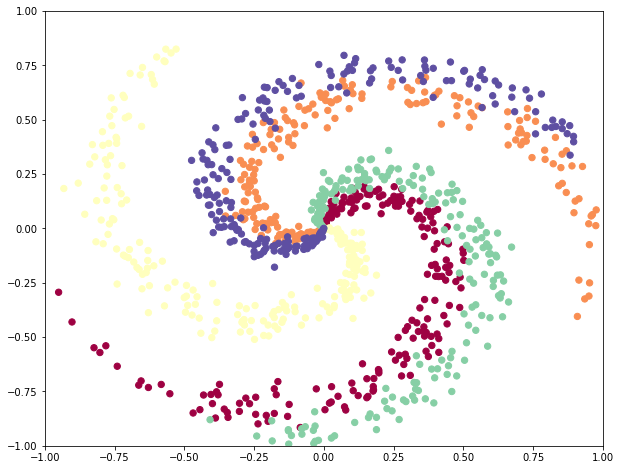

In [7]:
# Generate random, non-separable data.
np.random.seed(0)
N = 200 # points
D = 2 # dimensions
K = 5 # classes
X = np.zeros((N * K, D))
num_train_examples = X.shape[0]
y = np.zeros(N * K, dtype='uint8')
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N) # Radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # Theta.
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.show()

In [8]:
# Activation function
def sigmoid(x):
    x = 1 / (1 + np.exp(-x))
    return x

def sigmoid_grad(x):
    return x * (1-x)

def relu(x):
    return np.maximum(0, x)


In [ ]:
def three_layer_ne(X, y, model, learning_rate):
    # Parameter initialization.
    h = model['h']
    h2 = model['h2']
    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    
    # gradient descent loop
    num_examples = X.shape[0]
    plot_array_1 = []
    plot_array_2 = []
    
    for i in range(10000):
        # forward pass
        hidden_layer = sigmoid(np.dot(X, W1) + b1)
        hidden_layer2 = sigmoid(np.dot(hidden_layer, W2) + b2)
        scores = np.dot(hidden_layer2, W3) + b3
        
        